In [30]:
import utils
from sklearn.manifold import TSNE

In [31]:
idx = utils.split_index('shows/track_1_shows/split/train.csv')
da = utils.load_pool('shows/track_1_shows/feature', idx)

In [32]:
dataset = []
for key in da:
    dataset.append(da[key])

In [33]:
import numpy as np

dataset = np.array(dataset)
dataset.shape

(3000, 512)

In [286]:
tsne = TSNE(n_components=3, perplexity=50)

In [287]:
X = tsne.fit_transform(dataset)

In [8]:
X

array([[  5.146662 ,  -3.395875 ,  10.67867  ],
       [-25.63813  , -23.65627  , -15.920904 ],
       [-21.070314 ,  20.063911 ,  -7.6214466],
       ...,
       [-11.619463 ,  32.590786 ,  24.991013 ],
       [  8.935831 , -11.252647 ,  43.045223 ],
       [ 19.080654 ,  29.05912  , -18.678106 ]], dtype=float32)

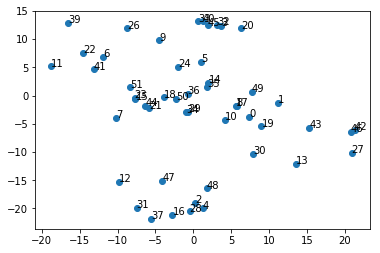

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X[:50, 0], X[:50, 1])

for i in enumerate(idx[:50]):
    ax.annotate(i[1], (X[i[0]][0], X[i[0]][1]))
plt.show()

In [246]:
from sklearn.manifold import MDS as lle

In [247]:
l = lle(n_components=24)

In [248]:
X = l.fit_transform(dataset)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X[:30, 0], X[:30, 1])

for i in enumerate(idx[:30]):
    ax.annotate(i[1], (X[i[0]][0], X[i[0]][1]))
plt.show()

In [199]:
scores = []
for i in range(len(X)):
    scores.append(np.sqrt(np.sum((X[i]-X[idx.index('32')])**2)))

In [200]:
final = list(zip(scores, idx))

In [201]:
final = list(sorted(zip(scores, idx)), key=lambda x:x[0]))

In [203]:
set([final[i][1] for i in range(500)]).intersection(rel['32'])

{'169', '40'}

In [96]:
np.sqrt(np.sum((X[24]-X[7])**2))

7.762551440356572

In [106]:
rel = utils.load_relevance('shows/track_1_shows/relevance_train.csv')

In [270]:
from sklearn.decomposition import NMF

pca = NMF(n_components=10)
X = pca.fit_transform(dataset)

In [288]:
m = 100

In [289]:
final_list = []
for j in range(len(X)):
    score = []
    for i in range(len(X)):
        score.append(X[i].dot(X[j].T)/(np.linalg.norm(X[i])*np.linalg.norm(X[j])))
    final = list(sorted(zip(score, idx), key=lambda x:x[0]))
    final_list.append([final[i][1] for i in range(1, m+1)])

In [290]:
recall = 0
hit = 0
for i in enumerate(idx):
    sc = len(set(final_list[i[0]]).intersection(set(rel[i[1]])))
    if len(rel[i[1]])!=0:
        recall += sc / len(rel[i[1]])
    if sc != 0:
        hit+=1   
recall

58.79027253975149

In [232]:
re = 0
for i in idx:
    re+=len(rel[i])
re

46925

In [285]:
recall / 3000

0.012187010521526749

In [245]:
1237/3000

0.41233333333333333

[['1486',
  '1051',
  '594',
  '1204',
  '3306',
  '2838',
  '1245',
  '392',
  '575',
  '565',
  '1133',
  '42',
  '1208',
  '3133',
  '2580',
  '916',
  '3051',
  '2033',
  '2227',
  '726',
  '1304',
  '320',
  '958',
  '1367',
  '1913',
  '791',
  '605',
  '2879',
  '564',
  '584',
  '1769',
  '1716',
  '2607',
  '867',
  '919',
  '568',
  '1608',
  '803',
  '1856',
  '87',
  '2656',
  '2554',
  '1972',
  '846',
  '1438',
  '2467',
  '3266',
  '1052',
  '609',
  '2111',
  '679',
  '1983',
  '2985',
  '1374',
  '1475',
  '2958',
  '857',
  '3063',
  '1698',
  '3249',
  '64',
  '2085',
  '2682',
  '1229',
  '1523',
  '1896',
  '2389',
  '2707',
  '1202',
  '1073',
  '3056',
  '908',
  '922',
  '1825',
  '2357',
  '1002',
  '3084',
  '3247',
  '2196',
  '367',
  '901',
  '2269',
  '46',
  '1382',
  '1888',
  '625',
  '804',
  '1118',
  '1791',
  '1887',
  '2850',
  '1422',
  '1447',
  '628',
  '739',
  '2878',
  '2226',
  '1080',
  '3136',
  '1922'],
 ['3315',
  '859',
  '2466',
  '258